In [303]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [304]:
pd.options.display.max_columns=300

In [332]:
box_scores_2016 = pd.read_csv('../NBA Model - Python/2016-17_teamBoxScore.csv')

In [333]:
box_scores_2016.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptMin,opptDayOff,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,NY,East,Atlantic,Away,Loss,240,0,88,17,18,6,6,22,87,32,0.3678,60,23,0.3833,27,9,0.3333,20,15,0.7500,13,29,42,18,27,19,24,0,0,0,0,45.1613,53.1250,0.4593,0.4195,24.5283,72.5000,15.8172,5.9777,5.9777,10.0000,1.0115,50.000,41.6667,87.6731,116.5653,-28.8922,0.3478,12.9969,0.9444,33.3333,CLE,East,Central,Home,Win,241,0,117,31,15,12,5,22,94,45,0.4787,59,32,0.5424,35,13,0.3714,19,14,0.7368,11,40,51,28,20,34,35,0,0,0,0,54.8387,68.8889,0.5715,0.5479,21.5686,78.4314,12.7812,11.9554,4.9814,8.4746,1.2447,102.375,84.9585,116.5653,87.6731,28.8922,0.4592,20.8951,2.0667,80.0000,100.3729,100.3729
1,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,CLE,East,Central,Home,Win,241,0,117,31,15,12,5,22,94,45,0.4787,59,32,0.5424,35,13,0.3714,19,14,0.7368,11,40,51,28,20,34,35,0,0,0,0,54.8387,68.8889,0.5715,0.5479,27.5000,75.4717,12.7812,11.9554,4.9814,8.4746,1.2447,102.375,84.9585,116.5653,87.6731,28.8922,0.4592,20.8951,2.0667,80.0000,NY,East,Atlantic,Away,Loss,240,0,88,17,18,6,6,22,87,32,0.3678,60,23,0.3833,27,9,0.3333,20,15,0.7500,13,29,42,18,27,19,24,0,0,0,0,45.1613,53.1250,0.4593,0.4195,30.9524,69.0476,15.8172,5.9777,5.9777,10.0000,1.0115,50.000,41.6667,87.6731,116.5653,-28.8922,0.3478,12.9969,0.9444,33.3333,100.3729,99.9564
2,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,UTA,West,Northwest,Away,Loss,241,0,104,19,14,9,5,19,82,40,0.4878,58,32,0.5517,24,8,0.3333,16,16,1.0000,6,25,31,26,20,37,21,0,0,0,0,47.6923,47.5000,0.5840,0.5366,17.1429,83.3333,13.5870,9.7257,5.4032,8.6207,1.2683,70.750,58.7137,112.3863,122.1120,-9.7257,0.4444,15.5687,1.3571,64.2857,POR,West,Northwest,Home,Win,239,0,113,22,13,5,3,18,75,39,0.5200,56,26,0.4643,19,13,0.6842,22,22,1.0000,5,29,34,26,28,23,36,0,0,0,0,52.3077,56.4103,0.6672,0.6067,14.7059,85.2941,13.3088,5.4032,3.2419,5.3571,1.5067,83.250,69.6653,122.1120,112.3863,9.7257,0.4699,18.3824,1.6923,38.4615,92.5380,92.1540
3,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,POR,West,Northwest,Home,Win,239,0,113,22,13,5,3,18,75,39,0.5200,56,26,0.4643,19,13,0.6842,22,22,1.0000,5,29,34,26,28,23,36,0,0,0,0,52.3077,56.4103,0.6672,0.6067,16.6667,82.8571,13.3088,5.4032,3.2419,5.3571,1.5067,83.250,69.6653,122.1120,112.3863,9.7257,0.4699,18.3824,1.6923,38.4615,UTA,West,Northwest,Away,Loss,241,0,104,19,14,9,5,19,82,40,0.4878,58,32,0.5517,24,8,0.3333,16,16,1.0000,6,25,31,26,20,37,21,0,0,0,0,47.6923,47.5000,0.5840,0.5366,19.3548,80.6452,13.5870,9.7257,5.4032,8.6207,1.2683,70.750,58.7137,112.3863,122.1120,-9.7257,0.4444,15.5687,1.3571,64.2857,92.5380,92.9252
4,2016-10-25,10:30,Regular,Maddox,Tre,Fraher,Pat,Crawford,Dan,SA,West,Southwest,Away,Win,240,0,129,25,14,13,3,19,98,47,0.4796,74,35,0.4730,24,12,0.5000,26,23,0.8846,21,34,55,31,33,33,32,0,0,0,0,61.1111,53.1915,0.5894,0.5408,43.7500,80.9524,11.3415,13.1610,3.0372,4.0541,1.3163,109.750,91.4583,130.5979,101.2387,29.3592,0.5165,16.8418,1.7857,92.8571,GS,West

In [334]:
box_scores_2016['gmDate'] = pd.to_datetime(box_scores_2016['gmDate'])


In [335]:
box_scores_2016['score_diff'] = box_scores_2016['teamPTS'] - box_scores_2016['opptPTS']

In [336]:
# drop irrelevant stats

team_stats = box_scores_2016.drop(['gmTime', 'seasTyp', 'offLNm1', 'offFNm1', 'offLNm2', 'offFNm2', 'offLNm3', 'offFNm3', 'teamConf', 'teamDiv', 'teamLoc', 'teamMin', 
                                   'opptConf', 'opptDiv', 'opptLoc', 'opptRslt', 'opptMin', 'teamRslt'], axis=1)



In [337]:
#reindex by team and date so that I can split the data by team

team_stats = team_stats.set_index(['teamAbbr', 'gmDate']).sort_index(level = 0, sort_remaining = True)

In [338]:
# Break up dfs by team
abbreviations = ['ATL', 'BOS', 'BKN', 'CHA', 'CHI','CLE','DAL','DEN','DET','GS','HOU','IND'
,'LAC','LAL','MEM','MIA','MIL','MIN','NO','NY','OKC','ORL','PHI','PHO','POR','SAC'
,'SA','TOR','UTA','WAS']

team_dfs_names = [str(x)+'_df' for x in abbreviations]
team_dfs = []

for team in team_dfs_names:
    team = team_stats.loc[team[:-3]]
    team_dfs.append(team)
    
    

In [340]:
# add the columns for running averages for each stat on each team
# these are the columns we will use for our features to train our model

for team in team_dfs:
    columns = list(team.columns)
    columns.remove('teamDayOff')    # running averages for these stats aren't very meaningful
    columns.remove('opptDayOff')
    columns.remove('score_diff')
    columns.remove('opptAbbr')
    for column in columns:
        team[str(column)+'_avg'] = team[column].expanding().mean()
        
        

C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [341]:
# Now that we have the running averages, we can remove the other unneeded columns

for team in team_dfs:
    columns_to_drop = team.columns[0:102]
    team.drop(columns, axis=1, inplace=True)


In [342]:
# Shift the columns down one row, so that the features are the running averages that lead up to the game (and don't include the stats of the game I'm trying to predict)
for team in team_dfs:
    team.loc[:, 'teamPTS_avg':] = team.loc[:, 'teamPTS_avg':].shift(1)
    team = team.dropna()
    
#uncomment to see result
#team_dfs[0]    

In [347]:
# Drop the first row where it has nan's because it didn't work above for some reason. 
for team in team_dfs:
    team.dropna(inplace=True)
    
# see result: 
# team_dfs[0]

C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [349]:
# re-add in the teamAbbr, because I need to merge the dataset by opptAbbr and teamAbbr (so that for one game, I have both team's stats)

i=0
for team in team_dfs:
    team['teamAbbr'] = abbreviations[i]
    i+=1

C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [350]:
# recombine into one large dataset
combined_df = pd.concat(team_dfs)

In [351]:
# merge dataset with itself to match up team vs opponnent and date
# each row should have 210 columns now, but there will be duplicate rows,
# since we will have a row for team vs opponent and opponent vs team
combined_df.reset_index(inplace=True)
combined_df1 = combined_df.copy()

In [352]:
merged_df = pd.merge(combined_df, combined_df1, how='inner', left_on=['gmDate', 'teamAbbr'], right_on=['gmDate', 'opptAbbr'])

In [353]:
merged_df[['gmDate', 'opptAbbr_x', 'teamAbbr_x', 'opptAbbr_y', 'teamAbbr_y', 'pace_avg_y', 'pace_avg_x']].sort_values('gmDate')
merged_df.head()
#merged_df['pace_avg_y'].value_counts()

,gmDate,teamDayOff_x,opptAbbr_x,opptDayOff_x,score_diff_x,teamPTS_avg_x,teamAST_avg_x,teamTO_avg_x,teamSTL_avg_x,teamBLK_avg_x,teamPF_avg_x,teamFGA_avg_x,teamFGM_avg_x,teamFG%_avg_x,team2PA_avg_x,team2PM_avg_x,team2P%_avg_x,team3PA_avg_x,team3PM_avg_x,team3P%_avg_x,teamFTA_avg_x,teamFTM_avg_x,teamFT%_avg_x,teamORB_avg_x,teamDRB_avg_x,teamTRB_avg_x,teamPTS1_avg_x,teamPTS2_avg_x,teamPTS3_avg_x,teamPTS4_avg_x,teamPTS5_avg_x,teamPTS6_avg_x,teamPTS7_avg_x,teamPTS8_avg_x,teamTREB%_avg_x,teamASST%_avg_x,teamTS%_avg_x,teamEFG%_avg_x,teamOREB%_avg_x,teamDREB%_avg_x,teamTO%_avg_x,teamSTL%_avg_x,teamBLK%_avg_x,teamBLKR_avg_x,teamPPS_avg_x,teamFIC_avg_x,teamFIC40_avg_x,teamOrtg_avg_x,teamDrtg_avg_x,teamEDiff_avg_x,teamPlay%_avg_x,teamAR_avg_x,teamAST/TO_avg_x,teamSTL/TO_avg_x,opptPTS_avg_x,opptAST_avg_x,opptTO_avg_x,opptSTL_avg_x,opptBLK_avg_x,opptPF_avg_x,opptFGA_avg_x,opptFGM_avg_x,opptFG%_avg_x,oppt2PA_avg_x,oppt2PM_avg_x,oppt2P%_avg_x,oppt3PA_avg_x,oppt3PM_avg_x,oppt3P%_avg_x,opptFTA_avg_x,opptFTM_avg_x,opptFT%_avg_x,opptORB_avg_x,opptDRB_avg_x,opptTRB_avg_x,opptPTS1_avg_x,opptPTS2_avg_x,opptPTS3_avg_x,opptPTS4_avg_x,opptPTS5_avg_x,opptPTS6_avg_x,opptPTS7_avg_x,opptPTS8_avg_x,opptTREB%_avg_x,opptASST%_avg_x,opptTS%_avg_x,opptEFG%_avg_x,opptOREB%_avg_x,opptDREB%_avg_x,opptTO%_avg_x,opptSTL%_avg_x,opptBLK%_avg_x,opptBLKR_avg_x,opptPPS_avg_x,opptFIC_avg_x,opptFIC40_avg_x,opptOrtg_avg_x,opptDrtg_avg_x,opptEDiff_avg_x,opptPlay%_avg_x,opptAR_avg_x,opptAST/TO_avg_x,opptSTL/TO_avg_x,poss_avg_x,pace_avg_x,teamAbbr_x,teamDayOff_y,opptAbbr_y,opptDayOff_y,score_diff_y,teamPTS_avg_y,teamAST_avg_y,teamTO_avg_y,teamSTL_avg_y,teamBLK_avg_y,teamPF_avg_y,teamFGA_avg_y,teamFGM_avg_y,teamFG%_avg_y,team2PA_avg_y,team2PM_avg_y,team2P%_avg_y,team3PA_avg_y,team3PM_avg_y,team3P%_avg_y,teamFTA_avg_y,teamFTM_avg_y,teamFT%_avg_y,teamORB_avg_y,teamDRB_avg_y,teamTRB_avg_y,teamPTS1_avg_y,teamPTS2_avg_y,teamPTS3_avg_y,teamPTS4_avg_y,teamPTS5_avg_y,teamPTS6_avg_y,teamPTS7_avg_y,teamPTS8_avg_y,teamTREB%_avg_y,teamASST%_avg_y,teamTS%_avg_y,teamEFG%_avg_y,teamOREB%_avg_y,teamDREB%_avg_y,teamTO%_avg_y,teamSTL%_avg_y,teamBLK%_avg_y,teamBLKR_avg_y,teamPPS_avg_y,teamFIC_avg_y,teamFIC40_avg_y,teamOrtg_avg_y,teamDrtg_avg_y,teamEDiff_avg_y,teamPlay%_avg_y,teamAR_avg_y,teamAST/TO_avg_y,teamSTL/TO_avg_y,opptPTS_avg_y,opptAST_avg_y,opptTO_avg_y,opptSTL_avg_y,opptBLK_avg_y,opptPF_avg_y,opptFGA_avg_y,opptFGM_avg_y,opptFG%_avg_y,oppt2PA_avg_y,oppt2PM_avg_y,oppt2P%_avg_y,oppt3PA_avg_y,oppt3PM_avg_y,oppt3P%_avg_y,opptFTA_avg_y,opptFTM_avg_y,opptFT%_avg_y,opptORB_avg_y,opptDRB_avg_y,opptTRB_avg_y,opptPTS1_avg_y,opptPTS2_avg_y,opptPTS3_avg_y,opptPTS4_avg_y,opptPTS5_avg_y,opptPTS6_avg_y,opptPTS7_avg_y,opptPTS8_avg_y,opptTREB%_avg_y,opptASST%_avg_y,opptTS%_avg_y,opptEFG%_avg_y,opptOREB%_avg_y,opptDREB%_avg_y,opptTO%_avg_y,opptSTL%_avg_y,opptBLK%_avg_y,opptBLKR_avg_y,opptPPS_avg_y,opptFIC_avg_y,opptFIC40_avg_y,opptOrtg_avg_y,opptDrtg_avg_y,opptEDiff_avg_y,opptPlay%_avg_y,opptAR_avg_y,opptAST/TO_avg_y,opptSTL/TO_avg_y,poss_avg_y,pace_avg_y,teamAbbr_y
0,2016-10-29,1,PHI,2,32,114.0,28.000000,21.000000,13.000000,7.000000,19.000000,88.00,44.000000,0.50000,62.000000,32.000000,0.516100,26.000000,12.000000,0.46150,18.000000,14.000000,0.777800,14.000000,38.000000,52.000000,29.000000,28.000000,24.000000,33.0,0.0,0.0,0.0,0.0,56.521700,63.636400,0.594200,0.568200,33.333300,76.000000,17.961000,12.570000,6.768500,11.29030,1.295500,101.250000,84.375000,110.229600,95.725700,14.503900,0.46320,19.321000,1.333300,61.904800,99.000000,25.000000,19.000000,14.0,4.0,20.000000,94.0,40.000000,0.42550,74.000000,34.000000,0.45950,20.000000,6.0,0.300000,18.000000,13.000000,0.722200,12.000000,28.000000,40.0,27.0,29.000000,24.000000,19.000000,0.0,0.0,0.0,0.0,43.478300,62.500000,0.48570,0.457400,30.000000,70.000000,15.712900,13.537000,3.867700,5.405400,1.053200,68.750000,57.291700,95.725700,110.229600,-14.503900,0.39600,17.132700,1.31580,73.684200,103.420500,103.420500,ATL,2,ATL,1,-32,97.000000,21.000000,14.000000,5.00,1

In [354]:
# I had to basically create a stat that was unique in each of the matchups so that I could delete the duplicates 
# (because I don't need to have Lakers vs Spurs AND Spurs vs Lakers if it is the same game.
# I chose to use pace_avg_x (home team) and pace_avg_y (away team) and average them because it would create a row that would most likely be the same if it was the same game. 
# These 5 games happened to have pace averages that WERE the same as another's so I had to delete them manually. 
merged_df[(merged_df['pace_avg_y'] == 103.420500) |
          (merged_df['pace_avg_y'] == 96.213000)  |
          (merged_df['pace_avg_y'] == 103.576300) |
          (merged_df['pace_avg_y'] == 103.012600) |
          (merged_df['pace_avg_y'] == 100.846500)][['teamAbbr_x', 'opptAbbr_x', 'gmDate', 'pace_avg_y']]

merged_df = merged_df.drop([2378, 164, 902, 2214, 1804])

In [355]:
#create a column that will have duplicates where game is the same (since pace_avg_x (hometeam) and pace_avg_y (away team) will be the same, just switched for two games that are the same.)

merged_df['pace_avg_z'] = (merged_df['pace_avg_x'] + merged_df['pace_avg_y'])/2
merged_df['pace_avg_z'].nunique()

1214

In [356]:
pd.options.display.max_rows = 50

In [357]:
merged_df = merged_df.drop_duplicates(subset = 'pace_avg_z', keep='first')

In [358]:
# our output will be the score_diff_x from the teams perspective (x) (teamPTS - opptPTS)
# clean up features (remove date, teamAbbr, opptAbbr, etc)

y = merged_df['score_diff_x']

X = merged_df.drop(['gmDate', 'opptAbbr_x', 'opptAbbr_y', 'teamAbbr_x', 'teamAbbr_y', 'score_diff_x', 'score_diff_y'], axis=1)

In [359]:
X

,teamDayOff_x,opptDayOff_x,teamPTS_avg_x,teamAST_avg_x,teamTO_avg_x,teamSTL_avg_x,teamBLK_avg_x,teamPF_avg_x,teamFGA_avg_x,teamFGM_avg_x,teamFG%_avg_x,team2PA_avg_x,team2PM_avg_x,team2P%_avg_x,team3PA_avg_x,team3PM_avg_x,team3P%_avg_x,teamFTA_avg_x,teamFTM_avg_x,teamFT%_avg_x,teamORB_avg_x,teamDRB_avg_x,teamTRB_avg_x,teamPTS1_avg_x,teamPTS2_avg_x,teamPTS3_avg_x,teamPTS4_avg_x,teamPTS5_avg_x,teamPTS6_avg_x,teamPTS7_avg_x,teamPTS8_avg_x,teamTREB%_avg_x,teamASST%_avg_x,teamTS%_avg_x,teamEFG%_avg_x,teamOREB%_avg_x,teamDREB%_avg_x,teamTO%_avg_x,teamSTL%_avg_x,teamBLK%_avg_x,teamBLKR_avg_x,teamPPS_avg_x,teamFIC_avg_x,teamFIC40_avg_x,teamOrtg_avg_x,teamDrtg_avg_x,teamEDiff_avg_x,teamPlay%_avg_x,teamAR_avg_x,teamAST/TO_avg_x,teamSTL/TO_avg_x,opptPTS_avg_x,opptAST_avg_x,opptTO_avg_x,opptSTL_avg_x,opptBLK_avg_x,opptPF_avg_x,opptFGA_avg_x,opptFGM_avg_x,opptFG%_avg_x,oppt2PA_avg_x,oppt2PM_avg_x,oppt2P%_avg_x,oppt3PA_avg_x,oppt3PM_avg_x,oppt3P%_avg_x,opptFTA_avg_x,opptFTM_avg_x,opptFT%_avg_x,opptORB_avg_x,opptDRB_avg_x,opptTRB_avg_x,opptPTS1_avg_x,opptPTS2_avg_x,opptPTS3_avg_x,opptPTS4_avg_x,opptPTS5_avg_x,opptPTS6_avg_x,opptPTS7_avg_x,opptPTS8_avg_x,opptTREB%_avg_x,opptASST%_avg_x,opptTS%_avg_x,opptEFG%_avg_x,opptOREB%_avg_x,opptDREB%_avg_x,opptTO%_avg_x,opptSTL%_avg_x,opptBLK%_avg_x,opptBLKR_avg_x,opptPPS_avg_x,opptFIC_avg_x,opptFIC40_avg_x,opptOrtg_avg_x,opptDrtg_avg_x,opptEDiff_avg_x,opptPlay%_avg_x,opptAR_avg_x,opptAST/TO_avg_x,opptSTL/TO_avg_x,poss_avg_x,pace_avg_x,teamDayOff_y,opptDayOff_y,teamPTS_avg_y,teamAST_avg_y,teamTO_avg_y,teamSTL_avg_y,teamBLK_avg_y,teamPF_avg_y,teamFGA_avg_y,teamFGM_avg_y,teamFG%_avg_y,team2PA_avg_y,team2PM_avg_y,team2P%_avg_y,team3PA_avg_y,team3PM_avg_y,team3P%_avg_y,teamFTA_avg_y,teamFTM_avg_y,teamFT%_avg_y,teamORB_avg_y,teamDRB_avg_y,teamTRB_avg_y,teamPTS1_avg_y,teamPTS2_avg_y,teamPTS3_avg_y,teamPTS4_avg_y,teamPTS5_avg_y,teamPTS6_avg_y,teamPTS7_avg_y,teamPTS8_avg_y,teamTREB%_avg_y,teamASST%_avg_y,teamTS%_avg_y,teamEFG%_avg_y,teamOREB%_avg_y,teamDREB%_avg_y,teamTO%_avg_y,teamSTL%_avg_y,teamBLK%_avg_y,teamBLKR_avg_y,teamPPS_avg_y,teamFIC_avg_y,teamFIC40_avg_y,teamOrtg_avg_y,teamDrtg_avg_y,teamEDiff_avg_y,teamPlay%_avg_y,teamAR_avg_y,teamAST/TO_avg_y,teamSTL/TO_avg_y,opptPTS_avg_y,opptAST_avg_y,opptTO_avg_y,opptSTL_avg_y,opptBLK_avg_y,opptPF_avg_y,opptFGA_avg_y,opptFGM_avg_y,opptFG%_avg_y,oppt2PA_avg_y,oppt2PM_avg_y,oppt2P%_avg_y,oppt3PA_avg_y,oppt3PM_avg_y,oppt3P%_avg_y,opptFTA_avg_y,opptFTM_avg_y,opptFT%_avg_y,opptORB_avg_y,opptDRB_avg_y,opptTRB_avg_y,opptPTS1_avg_y,opptPTS2_avg_y,opptPTS3_avg_y,opptPTS4_avg_y,opptPTS5_avg_y,opptPTS6_avg_y,opptPTS7_avg_y,opptPTS8_avg_y,opptTREB%_avg_y,opptASST%_avg_y,opptTS%_avg_y,opptEFG%_avg_y,opptOREB%_avg_y,opptDREB%_avg_y,opptTO%_avg_y,opptSTL%_avg_y,opptBLK%_avg_y,opptBLKR_avg_y,opptPPS_avg_y,opptFIC_avg_y,opptFIC40_avg_y,opptOrtg_avg_y,opptDrtg_avg_y,opptEDiff_avg_y,opptPlay%_avg_y,opptAR_avg_y,opptAST/TO_avg_y,opptSTL/TO_avg_y,poss_avg_y,pace_avg_y,pace_avg_z
0,1,2,114.000000,28.000000,21.000000,13.000000,7.000000,19.000000,88.000000,44.000000,0.500000,62.000000,32.000000,0.516100,26.000000,12.000000,0.461500,18.000000,14.000000,0.777800,14.000000,38.000000,52.000000,29.000000,28.000000,24.000000,33.000000,0.000000,0.0,0.0,0.0,56.521700,63.636400,0.594200,0.568200,33.333300,76.000000,17.961000,12.570000,6.768500,11.290300,1.295500,101.250000,84.375000,110.229600,95.725700,14.503900,0.463200,19.321000,1.333300,61.904800,99.000000,25.000000,19.000000,14.000000,4.000000,20.000000,94.000000,40.000000,0.425500,74.000000,34.000000,0.459500,20.000000,6.000000,0.300000,18.000000,13.000000,0.722200,12.000000,28.000000,40.000000,27.000000,29.000000,24.000000,19.000000,0.000000,0.0,0.0,0.0,43.478300,62.500000,0.485700,0.457400,30.000000,70.000000,15.712900,13.537000,3.867700,5.405400,1.053200,68.750000,57.291700,95.725700,110.229600,-14.503900,0.396000,17.132700,1.315800,73.684200,103.420500,103.420500,2,1,97.000000,21.000000,14.000000,5.000000,10.000000,22.000000,84.000000,

In [360]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [386]:
# try spltting data sequentially: first 80% of season will be training data. Last 20% of season will be testing data

merged_df_date_sort = merged_df.sort_values('gmDate')

X_date = merged_df_date_sort.drop(['gmDate', 'opptAbbr_x', 'opptAbbr_y', 'teamAbbr_x', 'teamAbbr_y', 'score_diff_x', 'score_diff_y', 'win'], axis=1)
X_date
y_date = merged_df_date_sort['score_diff_x']

In [ ]:
X_train_date = X_date.iloc[:972]
X_test_date = X_date.iloc[972:]
y_train_date = y_date.iloc[:972]
y_test_date = y_date.iloc[972:]

## Linear Regression model when the data when training and testing data IS NOT sorted by date


In [413]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.score(X_test, y_test))

print(list(zip(lin_reg.predict(X_test), y_test)))               # compare predicted scores to actual scores to see how far off they are...

-0.047586094785095234
[(1.0, -3), (6.0, 4), (-1.25, -4), (-10.0, 14), (-15.0, -10), (0.0, -26), (11.0, 14), (-6.0, -8), (-1.5, 4), (3.25, -5), (9.75, 13), (7.25, -13), (-0.25, 27), (2.5, 1), (0.75, -3), (-11.25, -3), (-11.25, -13), (-6.25, -8), (19.0, 5), (2.75, 7), (4.0, 17), (2.0, 7), (2.5, -2), (-15.0, -17), (-4.5, -21), (1.25, 13), (-5.25, -15), (-2.25, -22), (-6.5, -36), (4.0, -3), (4.5, -13), (7.0, -2), (3.0, -8), (-8.0, 13), (-9.75, 8), (-15.0, 3), (-0.5, -18), (-4.75, 7), (-2.0, -8), (3.0, 13), (-2.0, -11), (7.0, 18), (-4.5, -17), (-1.5, -9), (-0.25, -9), (-3.25, -27), (0.75, -36), (12.75, 25), (0.75, -1), (4.75, 18), (2.75, 13), (1.0, 26), (-1.0, 4), (-3.25, 3), (-6.5, -7), (-3.75, 4), (-1.25, -21), (11.5, 14), (6.5, 8), (-33.75, 4), (-8.75, -13), (-9.5, -14), (8.0, 19), (-2.5, -5), (9.0, 9), (20.5, 36), (9.5, 15), (-19.75, -27), (-4.25, -5), (3.25, -7), (9.25, -3), (9.5, 6), (6.75, -11), (-10.0, 2), (11.5, 13), (-16.75, 9), (16.75, 11), (-1.0, 4), (-4.75, -28), (6.0, -9), (7.

## Linear Regression model when the data when training and testing data IS sorted by date


In [416]:

lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_date, y_train_date)
print(lin_reg2.score(X_test_date, y_test_date))

print(list(zip(lin_reg2.predict(X_test_date), y_test_date)))               # compare predicted scores to actual scores to see how far off they are...


-0.03466423012301734
[(-3.0, -9), (2.0, -6), (-5.0, -5), (9.0, 28), (-7.0, -22), (-11.0, -8), (1.0, -6), (-11.0, 15), (5.0, 20), (10.0, 2), (-9.0, 23), (-9.0, 32), (3.0, -6), (-9.0, -18), (5.0, -21), (-7.0, 4), (7.0, 13), (15.0, 39), (-1.0, -1), (-8.0, 5), (3.0, -6), (10.0, 8), (-4.0, -14), (5.0, -7), (8.0, -12), (-7.0, 11), (5.0, 15), (11.0, 30), (-3.0, 21), (-1.0, 8), (3.0, 6), (-12.0, -5), (-7.0, -12), (8.0, 18), (15.0, -16), (16.0, 3), (5.0, -42), (-10.0, -4), (-3.0, -30), (0.0, 16), (-4.0, -16), (-5.0, 8), (-5.0, 5), (-5.0, 9), (-2.0, -4), (4.0, 25), (3.0, -6), (4.0, 5), (-5.0, -16), (5.0, 17), (1.0, -11), (2.0, -14), (-3.0, -25), (-11.0, -7), (12.0, 16), (8.0, 3), (-11.0, 7), (3.0, -1), (-6.0, 8), (12.0, 9), (-10.0, -15), (5.0, 15), (9.0, -13), (-2.0, -25), (-4.0, 3), (-11.0, 2), (-9.0, -7), (-9.0, -2), (5.0, 24), (-3.0, 22), (7.0, 25), (-9.0, -7), (9.0, 7), (-8.0, -13), (6.0, 9), (-14.0, -4), (-1.0, 18), (0.0, -17), (-4.0, -7), (3.0, 2), (-8.0, -15), (-6.0, 28), (-1.0, -7), (9.0

## Lasso model when the data when training and testing data IS NOT sorted by date

In [423]:

lasso = Lasso()
lasso.fit(X_train, y_train)
print('lasso score: ', lasso.score(X_test, y_test))
#list(zip(X_train.columns, lasso.coef_))

print(list(zip(lasso.predict(X_test).round(1), y_test)))             # compare predicted scores to actual scores to see how far off they are...


lasso score:  0.1379081282434924
[(2.5, -3), (2.8, 4), (-4.9, -4), (0.7, 14), (-4.6, -10), (-0.4, -26), (4.9, 14), (-6.3, -8), (-0.6, 4), (-0.4, -5), (3.2, 13), (2.9, -13), (1.4, 27), (2.2, 1), (1.8, -3), (-1.9, -3), (-4.6, -13), (-6.7, -8), (9.0, 5), (2.9, 7), (1.7, 17), (0.4, 7), (2.4, -2), (-11.1, -17), (-8.4, -21), (4.4, 13), (3.5, -15), (-0.5, -22), (-0.2, -36), (1.5, -3), (3.7, -13), (0.9, -2), (-1.5, -8), (-2.4, 13), (1.1, 8), (-10.3, 3), (0.3, -18), (-2.9, 7), (-2.6, -8), (6.3, 13), (-4.3, -11), (4.0, 18), (2.2, -17), (1.6, -9), (-0.9, -9), (0.3, -27), (-0.3, -36), (7.1, 25), (-0.0, -1), (-1.3, 18), (2.2, 13), (3.3, 26), (-0.3, 4), (2.1, 3), (-5.1, -7), (-3.3, 4), (-0.1, -21), (9.7, 14), (3.9, 8), (6.1, 4), (-7.0, -13), (0.4, -14), (3.2, 19), (1.8, -5), (7.9, 9), (11.6, 36), (3.2, 15), (-6.1, -27), (-1.4, -5), (-0.4, -7), (1.7, -3), (5.7, 6), (5.8, -11), (-5.1, 2), (3.6, 13), (7.2, 9), (9.6, 11), (-0.7, 4), (-7.2, -28), (3.3, -9), (1.1, 23), (-0.9, -1), (-1.6, 2), (3.6, -13), (

## Lasso Model when the data when training and testing data IS sorted by date


In [424]:

lasso2 = Lasso()
lasso2.fit(X_train_date, y_train_date)
print('lasso score: ', lasso2.score(X_test_date, y_test_date))

print(list(zip(lasso.predict(X_test_date).round(1), y_test_date)))               # compare predicted scores to actual scores to see how far off they are...


lasso score:  0.08446494449633413
[(-2.5, -9), (-0.7, -6), (-2.1, -5), (5.5, 28), (-0.5, -22), (-5.5, -8), (0.7, -6), (-0.2, 15), (-0.6, 20), (11.3, 2), (-0.7, 23), (1.4, 32), (1.6, -6), (-4.6, -18), (0.8, -21), (-5.2, 4), (2.2, 13), (9.1, 39), (1.0, -1), (-0.3, 5), (-3.2, -6), (2.9, 8), (-3.3, -14), (-1.9, -7), (-2.4, -12), (-2.1, 11), (0.3, 15), (11.7, 30), (-2.4, 21), (-1.8, 8), (-0.3, 6), (-1.6, -5), (-1.6, -12), (-1.3, 18), (8.0, -16), (8.9, 3), (3.3, -42), (-5.4, -4), (0.1, -30), (0.1, 16), (0.4, -16), (-3.2, 8), (-1.0, 5), (-3.9, 9), (-1.0, -4), (7.1, 25), (5.8, -6), (5.4, 5), (-5.9, -16), (2.2, 17), (1.7, -11), (3.5, -14), (-2.0, -25), (-3.3, -7), (7.7, 16), (-0.8, 3), (-3.9, 7), (-0.9, -1), (2.5, 8), (4.5, 9), (-1.3, -15), (3.2, 15), (3.9, -13), (-5.3, -25), (2.1, 3), (-3.7, 2), (-3.7, -7), (-2.2, -2), (6.6, 24), (-0.2, 22), (1.6, 25), (-4.4, -7), (3.8, 7), (-0.1, -13), (4.1, 9), (-1.9, -4), (1.7, 18), (-1.1, -17), (-3.4, -7), (-1.2, 2), (-0.0, -15), (-1.0, 28), (-0.7, -7), (9

In [ ]:
sorted(list(zip(X_train_date.columns, lasso2.coef_)), key = lambda x: x[1])    # view the coefficients


## Elastic Net Model when the data when training and testing data IS NOT sorted by date


In [425]:
elastic = ElasticNet()
elastic.fit(X_train, y_train)
print('R2 score on training data: ', elastic.score(X_train, y_train))
print('R2 score on test data: ', elastic.score(X_test, y_test))

print(list(zip(elastic.predict(X_test).round(1), y_test)))             # compare predicted scores to actual scores to see how far off they are...


R2 score on training data:  0.13423917373584837
R2 score on test data:  0.13441324856717307
[(2.6, -3), (3.4, 4), (-5.2, -4), (0.1, 14), (-4.9, -10), (-0.9, -26), (4.8, 14), (-6.5, -8), (-1.0, 4), (-0.4, -5), (3.6, 13), (4.4, -13), (0.3, 27), (2.2, 1), (1.7, -3), (-2.8, -3), (-5.0, -13), (-6.9, -8), (9.5, 5), (3.7, 7), (1.8, 17), (-0.1, 7), (3.1, -2), (-11.6, -17), (-8.8, -21), (5.3, 13), (3.2, -15), (-0.2, -22), (-0.6, -36), (2.0, -3), (4.0, -13), (1.3, -2), (-1.6, -8), (-2.6, 13), (0.9, 8), (-10.7, 3), (0.6, -18), (-2.4, 7), (-2.6, -8), (6.8, 13), (-4.5, -11), (4.5, 18), (1.8, -17), (1.9, -9), (-1.2, -9), (0.2, -27), (-0.3, -36), (6.9, 25), (-0.6, -1), (-1.3, 18), (2.2, 13), (2.2, 26), (-0.6, 4), (1.9, 3), (-5.1, -7), (-3.3, 4), (-0.4, -21), (10.0, 14), (3.7, 8), (6.1, 4), (-7.9, -13), (-0.1, -14), (4.1, 19), (1.3, -5), (8.5, 9), (11.8, 36), (4.4, 15), (-6.0, -27), (-1.5, -5), (-0.5, -7), (2.2, -3), (6.3, 6), (6.1, -11), (-5.4, 2), (4.5, 13), (5.4, 9), (9.5, 11), (0.1, 4), (-7.3, -28

## Elastic Net Model when the data when training and testing data IS sorted by date 


In [426]:

elastic2 = ElasticNet()
elastic2.fit(X_train_date, y_train_date)
print('R2 score on training data: ', elastic2.score(X_train_date, y_train_date))
print('R2 score on test data: ', elastic2.score(X_test_date, y_test_date))

print(list(zip(elastic2.predict(X_test).round(1), y_test)))             # compare predicted scores to actual scores to see how far off they are...


R2 score on training data:  0.1620699932288191
R2 score on test data:  0.07396125045032786
[(3.1, -3), (3.2, 4), (-5.7, -4), (0.2, 14), (-8.1, -10), (-2.3, -26), (4.2, 14), (-7.7, -8), (-0.8, 4), (-0.4, -5), (3.6, 13), (4.2, -13), (-0.3, 27), (1.1, 1), (0.7, -3), (-4.5, -3), (-4.9, -13), (-6.9, -8), (10.4, 5), (2.8, 7), (1.1, 17), (-1.4, 7), (1.7, -2), (-13.8, -17), (-9.4, -21), (5.5, 13), (3.0, -15), (0.7, -22), (-3.9, -36), (1.9, -3), (4.0, -13), (-0.2, -2), (-2.9, -8), (-2.6, 13), (1.5, 8), (-11.0, 3), (-0.5, -18), (-0.3, 7), (-3.2, -8), (6.3, 13), (-5.5, -11), (4.8, 18), (1.8, -17), (1.9, -9), (-1.7, -9), (-0.8, -27), (-1.5, -36), (6.6, 25), (-0.1, -1), (-2.1, 18), (2.2, 13), (3.3, 26), (-1.8, 4), (2.7, 3), (-4.8, -7), (-4.5, 4), (-0.7, -21), (10.8, 14), (4.3, 8), (2.6, 4), (-9.1, -13), (-2.3, -14), (5.0, 19), (1.6, -5), (9.6, 9), (12.9, 36), (6.4, 15), (-7.5, -27), (-2.5, -5), (-0.5, -7), (0.2, -3), (5.6, 6), (5.5, -11), (-6.3, 2), (5.5, 13), (6.0, 9), (9.4, 11), (1.5, 4), (-8.0, 

In [396]:
sorted(list(zip(X_train.columns, elastic.coef_)), key=lambda x: x[1])

[('oppt3PA_avg_x', -0.29375731892220364),
 ('teamPTS4_avg_x', -0.21198720972743554),
 ('teamFIC_avg_y', -0.17873392520833828),
 ('opptASST%_avg_x', -0.09859917656315736),
 ('opptASST%_avg_y', -0.09656347309459977),
 ('opptPTS1_avg_y', -0.0882288035655382),
 ('teamPTS1_avg_y', -0.07872927454670933),
 ('opptFIC_avg_x', -0.056853044151730044),
 ('teamEDiff_avg_y', -0.05031228101392469),
 ('opptTRB_avg_x', -0.044703204380173375),
 ('opptPTS1_avg_x', -0.03950347311637231),
 ('teamBLKR_avg_x', -0.02932528038844283),
 ('opptDayOff_x', -0.0),
 ('teamPTS_avg_x', 0.0),
 ('teamAST_avg_x', 0.0),
 ('teamTO_avg_x', -0.0),
 ('teamSTL_avg_x', 0.0),
 ('teamBLK_avg_x', -0.0),
 ('teamPF_avg_x', -0.0),
 ('teamFGA_avg_x', 0.0),
 ('teamFGM_avg_x', 0.0),
 ('teamFG%_avg_x', -0.0),
 ('team2PA_avg_x', -0.0),
 ('team2PM_avg_x', -0.0),
 ('team2P%_avg_x', 0.0),
 ('team3PM_avg_x', 0.0),
 ('team3P%_avg_x', -0.0),
 ('teamFTM_avg_x', 0.0),
 ('teamFT%_avg_x', -0.0),
 ('teamORB_avg_x', 0.0),
 ('teamDRB_avg_x', -0.0),
 (

In [365]:
y_predict = elastic.predict(X_test)

x_points = range(len(X_test))

Text(0.5, 0, 'actual_score')

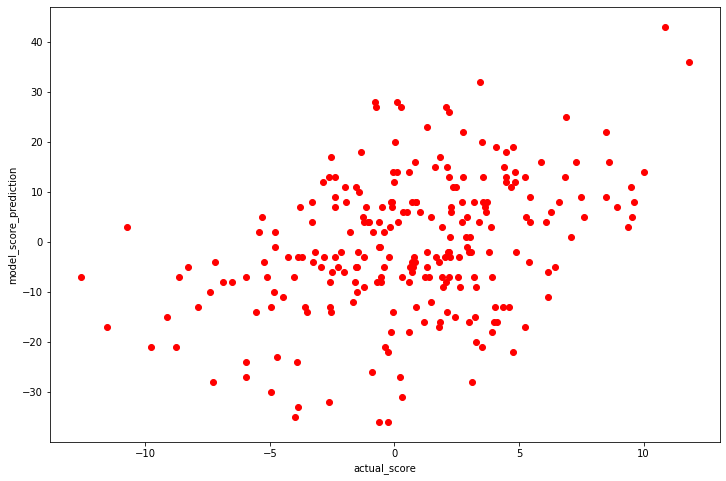

In [408]:
fig, ax = plt.subplots(figsize =(12, 8))

ax.plot(y_predict, y_test, 'ro')
ax.set_ylabel('model_score_prediction')
ax.set_xlabel('actual_score')

# How accurately can we just predict a winner based on a teams average stats leading up to the game?

Now I will add a column for win (0 or 1) and use a logistic regression model to see how predictive a teams average stats going into a game are for predicting the outcome of that game

In [409]:
merged_df['win'] = merged_df['score_diff_x'].apply(lambda x: 1 if x>0 else 0)     # add a column for win if the spread is positive

In [397]:
y2 = merged_df['win']

X2 = merged_df.drop(['gmDate', 'opptAbbr_x', 'opptAbbr_y', 'teamAbbr_x', 'teamAbbr_y', 'score_diff_x', 'score_diff_y'], axis=1)        # remove unneeded columns

In [403]:
merged_df_date_sort['win'] = merged_df_date_sort['score_diff_x'].apply(lambda x: 1 if x>0 else 0)

In [404]:
X_date_win = merged_df_date_sort.drop(['gmDate', 'opptAbbr_x', 'opptAbbr_y', 'teamAbbr_x', 'teamAbbr_y', 'score_diff_x', 'score_diff_y', 'win'], axis=1)
y_date_win = merged_df_date_sort['win']

In [405]:
X_train_date_win = X_date_win.iloc[:972]
X_test_date_win = X_date_win.iloc[972:]
y_train_date_win = y_date_win.iloc[:972]
y_test_date_win = y_date_win.iloc[972:]

In [407]:
log_reg2 = LogisticRegression()

log_reg2.fit(X_train_date_win, y_train_date_win)

print('logistic regression score: ',  log_reg2.score(X_test_date_win, y_test_date_win))

C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logistic regression score:  0.5619834710743802


In [401]:
log_reg = LogisticRegression()

log_reg.fit(X2_train_date, y2_train_date)

print('logistic regression score: ',  log_reg.score(X2_test_date, y2_test_date))

NameError: name 'X2_train_date' is not defined

In [400]:
#list(zip(log_reg.predict(X2_test), y2_test))

log_reg.coef_

array([[ 4.08205710e-02, -4.62401493e-02, -1.92407124e-02,
         4.81234917e-02,  4.42784525e-03,  6.74003248e-02,
         4.21728941e-04, -5.82972518e-02,  6.23844591e-02,
         3.35212054e-03,  1.39126433e-04, -7.61434818e-03,
         3.07393232e-02,  7.83219653e-04,  6.99988073e-02,
        -2.73872027e-02, -1.28523471e-03,  5.71269099e-02,
         2.50882291e-03, -3.93249955e-03,  2.20381677e-02,
        -5.57269888e-02, -3.36888211e-02, -3.14814512e-02,
        -2.49143555e-03,  7.07573873e-02, -7.71716220e-03,
        -8.92107316e-02,  3.31637994e-02,  3.11005273e-03,
         4.48959962e-03,  4.01396615e-02, -9.39890199e-03,
        -2.17914270e-04, -2.26590944e-04, -5.37829486e-02,
        -3.82341183e-02,  2.83857975e-03,  6.44135808e-02,
        -1.65041254e-03, -3.84485823e-02,  7.68372193e-05,
         3.34576042e-02, -1.32701304e-02,  8.09144461e-03,
         3.80410796e-02, -2.99496349e-02, -1.53681425e-04,
        -1.02519807e-02, -1.45416029e-02,  1.03844146e-0